In [0]:
#Correction of the bug for ImageDataBunch
!curl -s https://course.fast.ai/setup/colab | bash
!pip uninstall torch torchvision -y
!pip install torch==1.4.0 torchvision==0.5.0

Updating fastai...
Done.
Uninstalling torch-1.5.0+cu101:
  Successfully uninstalled torch-1.5.0+cu101
Uninstalling torchvision-0.6.0+cu101:
  Successfully uninstalled torchvision-0.6.0+cu101
     |████████████████████████████████| 753.4MB 20kB/s 
     |████████████████████████████████| 4.0MB 42kB/s 


In [0]:
!pip install pretrainedmodels
import pretrainedmodels 
import os
from torch.utils.data import Dataset
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import time
import numpy as np
import pandas as pd
import os
import datetime as dt
from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser
from PIL import Image
import torch
from torch.optim import lr_scheduler
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms, datasets, models
%matplotlib inline
from fastai import *
from fastai.vision import *
import seaborn as sns
from sklearn.metrics import auc,roc_curve

from math import floor

     |████████████████████████████████| 61kB 3.5MB/s 
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp36-none-any.whl size=60962 sha256=4689f460d58e35affeaa3799dbe64324166a8f4edabdfd1ba229317544723378
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
Successfully built pretrainedmodels


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls '/content/drive/My Drive/AMMI-AIMS-GHANA/Projet on Kaggle Competition'

test  test.zip	train  train.zip


In [0]:
train_path = "/content/drive/My Drive/AMMI-AIMS-GHANA/Projet on Kaggle Competition/train/"
test_path = "/content/drive/My Drive/AMMI-AIMS-GHANA/Projet on Kaggle Competition/test/0/"
# extraimage_path = "../input/ammi-2020-convnets/extraimages/extraimages"

In [0]:
def get_labels(file_path): 
    dir_name = os.path.dirname(file_path)
    split_dir_name = dir_name.split("/")
    dir_levels = len(split_dir_name)
    label  = split_dir_name[dir_levels-1]
    return(label)

In [0]:
get_labels(train_path+"cgm/train-cgm-528.jpg")

'cgm'

In [0]:
from glob import glob
imagePatches = glob(train_path+"*/*.*", recursive=True)
imagePatches[0:10]

['/content/drive/My Drive/AMMI-AIMS-GHANA/Projet on Kaggle Competition/train/cbsd/train-cbsd-1424.jpg',
 '/content/drive/My Drive/AMMI-AIMS-GHANA/Projet on Kaggle Competition/train/cbsd/train-cbsd-1386.jpg',
 '/content/drive/My Drive/AMMI-AIMS-GHANA/Projet on Kaggle Competition/train/cbsd/train-cbsd-135.jpg',
 '/content/drive/My Drive/AMMI-AIMS-GHANA/Projet on Kaggle Competition/train/cbsd/train-cbsd-1392.jpg',
 '/content/drive/My Drive/AMMI-AIMS-GHANA/Projet on Kaggle Competition/train/cbsd/train-cbsd-139.jpg',
 '/content/drive/My Drive/AMMI-AIMS-GHANA/Projet on Kaggle Competition/train/cbsd/train-cbsd-1345.jpg',
 '/content/drive/My Drive/AMMI-AIMS-GHANA/Projet on Kaggle Competition/train/cbsd/train-cbsd-1425.jpg',
 '/content/drive/My Drive/AMMI-AIMS-GHANA/Projet on Kaggle Competition/train/cbsd/train-cbsd-1370.jpg',
 '/content/drive/My Drive/AMMI-AIMS-GHANA/Projet on Kaggle Competition/train/cbsd/train-cbsd-1342.jpg',
 '/content/drive/My Drive/AMMI-AIMS-GHANA/Projet on Kaggle Competi

In [0]:

path=""
tfms = get_transforms(do_flip=True,flip_vert=True,max_rotate=360,max_warp=0,max_zoom=1.1,max_lighting=0.3,p_lighting=0.4)

In [0]:
data = ImageDataBunch.from_name_func(path, imagePatches, label_func=get_labels,  size=500, 
                                     bs=30,num_workers=2,test = test_path,ds_tfms=tfms
                                  ).normalize(imagenet_stats)  

In [0]:
type(data)

fastai.vision.data.ImageDataBunch

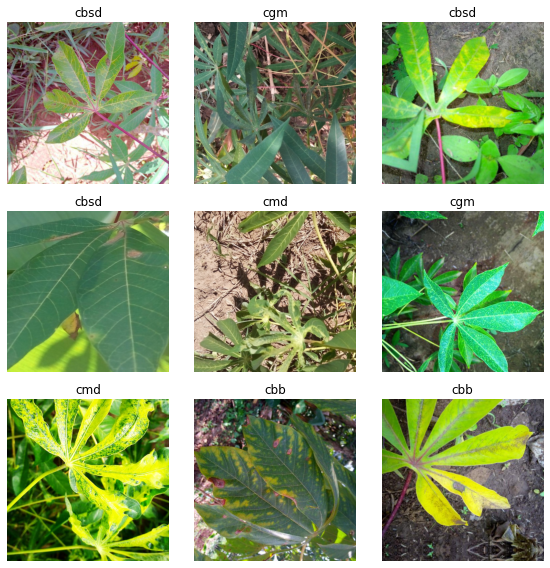

In [0]:
data.show_batch(rows=3, figsize=(8,8))

In [0]:
def se_resnext50_32x4d(pretrained=False):
    pretrained = 'imagenet' if pretrained else None
    model = pretrainedmodels.se_resnext50_32x4d(pretrained=pretrained)
    # model = Add_layer(model)
    return model

# New Section

In [0]:
learner = cnn_learner(data, se_resnext50_32x4d, pretrained=True,
                   cut=-2, split_on=lambda m: (m[0][3], m[1]),metrics=[accuracy])

In [0]:
learner.lr_find()
learner.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time


In [0]:
lr=1e-18
learner.fit_one_cycle(20, lr)

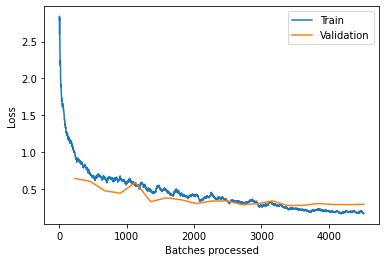

In [0]:
learner.recorder.plot_losses()

In [0]:
learner.validate()

[0.29285744, tensor(0.9125)]

In [0]:
interp = ClassificationInterpretation.from_learner(learner)

In [0]:
preds,y = learner.TTA(ds_type=DatasetType.Test)

In [0]:
predictions = preds.numpy()

In [0]:
class_preds = np.argmax(predictions, axis=1)


In [0]:
categories = ['cbb','cbsd','cgm','cmd','healthy']

def map_to_categories(predictions):
    return(categories[predictions])

categories_preds = list(map(map_to_categories,class_preds))

In [0]:
filenames = list(map(os.path.basename,os.listdir(test_path)))

In [0]:
df_sub = pd.DataFrame({'Category':categories_preds,'Id':filenames})

In [0]:
df_sub.to_csv('submission_categories21.csv', header=True, index=False)

In [0]:
# df_sub.to_csv('drive/My Drive/ammi-2020-convnets/submission_categories2.csv', header=True, index=False)

In [0]:
df_sub.to_csv('drive/My Drive/AMMI-AIMS-GHANA/submission_categories21.csv', header=True, index=False)